# Analyse frequency distribution of words

## Installation des dépendences

In [3]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Création d'une liste de stopwords

In [4]:
from nltk.corpus import stopwords

sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [5]:
print(f"{len(sw)} stopwords used: {sorted(sw)}")

197 stopwords used: ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', '

## Visualiser les termes les plus fréquents

In [7]:
path = "../data/1960-1970.txt"
limit = 10**8

with open(path, encoding='utf-16') as f:
    text = f.read()[:limit]

In [8]:
# détecter les mots
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

18833678 words found


In [9]:
words[:50]

['PUBLICATION',
 'PERIODIQUE',
 'VILLE',
 'DE',
 'BRUXELLES',
 'AnnÃ',
 '©',
 'e',
 '1960',
 'BULLETIN',
 'COMMUNAL',
 'TOME',
 'II',
 '"',
 '_u',
 'Impr',
 '.',
 'H',
 '.',
 '6',
 'M',
 '.',
 'S',
 'C',
 'H',
 'A',
 'U',
 'M',
 'A',
 'N',
 'S',
 'SociÃ',
 '©',
 'tÃ',
 '©',
 'Anonyme',
 'Parvis',
 'Saint',
 '-',
 'Gilles',
 ',',
 '41',
 'Bruxelles',
 '1960',
 'N',
 '"',
 '14',
 'COMPTE',
 'R',
 'E']

In [10]:
kept = [w.lower() for w in words if len(w) > 3 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

4273523 words kept (101491 different word forms)


In [11]:
fdist = nltk.FreqDist(kept)
fdist.most_common(50)

[('francs', 26900),
 ('publique', 17947),
 ('budget', 17605),
 ('ville', 17485),
 ('voor', 17400),
 ('collã', 17269),
 ('conseil', 16970),
 ('bruxelles', 15881),
 ('communal', 14905),
 ('ãªtre', 14757),
 ('article', 14663),
 ('service', 14138),
 ('travaux', 13523),
 ('bourgmestre', 13292),
 ('compte', 12055),
 ('question', 11274),
 ('part', 10966),
 ('assistance', 10656),
 ('considã', 10541),
 ('pense', 10530),
 ('commission', 10445),
 ('echevin', 10367),
 ('intã', 10104),
 ('monsieur', 9954),
 ('annã', 9610),
 ('cours', 9386),
 ('penses', 9250),
 ('recettes', 8902),
 ('ration', 8769),
 ('intervention', 8659),
 ('worden', 8644),
 ('personnel', 8609),
 ('cembre', 8527),
 ('crois', 8433),
 ('rant', 8074),
 ('mãªme', 7985),
 ('door', 7954),
 ('etat', 7515),
 ('avis', 7324),
 ('membres', 7179),
 ('mesdames', 7141),
 ('messieurs', 7090),
 ('administration', 6840),
 ('plan', 6695),
 ('rapport', 6627),
 ('mars', 6623),
 ('ecole', 6521),
 ('zijn', 6477),
 ('taxe', 6343),
 ('frais', 6288)]

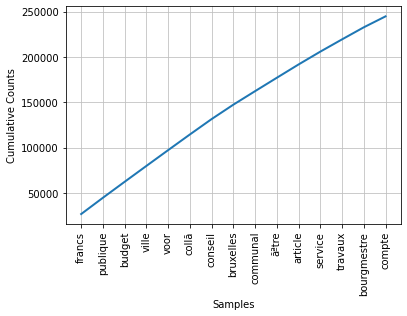

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
fdist.plot(15, cumulative=True)

In [13]:
# Impression des mots qui n'apparaissent qu'une fois dans le corpus
fdist.hapaxes()[:30]

['homie',
 'morbide',
 'abominablement',
 'sobrement',
 'consol',
 'congolais',
 'cruels',
 'compteront',
 'leslimites',
 'pasinomie',
 'contentieuses',
 'juridictionnelle',
 'buttgenbach',
 'quipent',
 'couils',
 'frontophocomã',
 'comulementa',
 'flash',
 'polar',
 'simulation',
 'javal',
 'mination',
 'ophtalmologiques',
 'reniformes',
 'lyse',
 'admiavis',
 'trimo',
 'excus',
 'jezfj',
 'instiau']

In [14]:
long_words = [w for w in voc if len(w) > 15]
sorted(long_words)[:30]

['aaelomeratieraad',
 'aanaardingsstraat',
 'aanaardingstraat',
 'aanbebestedingen',
 'aanbestedingbestek',
 'aanbestedingbestekken',
 'aanbestedingsbestek',
 'aanbestedingsbestekken',
 'aanbestedingsdokumenten',
 'aanbestedingsdossier',
 'aanbestedingsdossiers',
 'aandeelpercentage',
 'aangeremindering',
 'aangerevermindering',
 'aanknopingspunten',
 'aankoopcommissie',
 'aankoopcomraissie',
 'aankooponderhandelingen',
 'aankoopontvangsten',
 'aankoopprogramma',
 'aanleggingswerken',
 'aanlingsvergunningen',
 'aanmoedigingspremie',
 'aanmoedigingspremies',
 'aannemingskontrakt',
 'aannemingswerken',
 'aanpassingsbladen',
 'aanpassingswerken',
 'aanpiantingsdienst',
 'aanplakbfljetten']